# Linear Regression

- Date: 2018-04-12

In [1]:
# Import Libraries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [3]:
# Hyper-parameters

input_size = 1
output_size = 1
num_epochs = 60
learning_rate=1e-3

In [5]:
# Toy Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [6]:
# Linear Regression Model

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear=nn.Linear(input_size, output_size)
    def forward(self, x):
        out=self.linear(x)
        return out

In [7]:
model=LinearRegression(input_size, output_size)

In [8]:
# Loss and Optimizer

criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
# Train the Model

for epoch in range(num_epochs):
    
    # Convert numpy to torch Variable
    inputs=Variable(torch.from_numpy(x_train))
    targets=Variable(torch.from_numpy(y_train))
    
    # Forward + Backward + Optimize
    optimizer.zero_grad()
    outputs=model(inputs)
    loss=criterion(outputs, targets) # prediction, real value
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print('Epoch [%d/%d], Loss: %4f' %(epoch+1, num_epochs, loss.data[0]))    

Epoch [5/60], Loss: 7.161691
Epoch [10/60], Loss: 3.005033
Epoch [15/60], Loss: 1.321096
Epoch [20/60], Loss: 0.638897
Epoch [25/60], Loss: 0.362519
Epoch [30/60], Loss: 0.250546
Epoch [35/60], Loss: 0.205175
Epoch [40/60], Loss: 0.186787
Epoch [45/60], Loss: 0.179329
Epoch [50/60], Loss: 0.176300
Epoch [55/60], Loss: 0.175065
Epoch [60/60], Loss: 0.174556


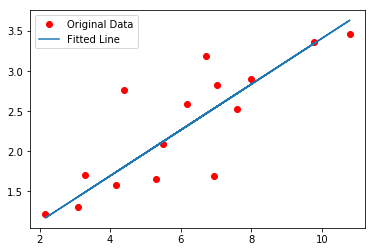

In [16]:
# Plot the Graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy() # prediction을 torch로 했었으니까 numpy로 변환해주는 작업이 필요함
plt.plot(x_train, y_train, 'ro', label='Original Data') # 점으로 나타내줌. ro.
plt.plot(x_train, predicted, label='Fitted Line') 
plt.legend()
plt.show()

In [18]:
# Save the model

torch.save(model.state_dict(), 'model.pkl') # 익숙해지자잉.